In [67]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [3]:
epitomes = []
for file in os.listdir('../epitomes'):
    with open(os.path.join('../epitomes', file), 'r', encoding='utf-8') as f:
        text = f.readlines()
        epitomes.append(text[-1])

In [40]:
previous_i = 0
epitomes_chunks = []
for i in np.arange(int(len(epitomes)*0.05), len(epitomes), len(epitomes)*0.05):
    i = int(i)
    epitomes_chunks.append("".join(epitomes[previous_i:i]))
    previous_i = i

In [48]:
tfidf_word_bigrams = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), max_features=100)

In [49]:
epitomes_word_bigrams = tfidf_word_bigrams.fit_transform(epitomes_chunks)

In [50]:
i = 1
for chunk in epitomes_chunks:
    print(f'Chunk {i} has length {len(chunk)}')
    i += 1

Chunk 1 has length 75985
Chunk 2 has length 97292
Chunk 3 has length 106649
Chunk 4 has length 76644
Chunk 5 has length 79890
Chunk 6 has length 61309
Chunk 7 has length 62284
Chunk 8 has length 76886
Chunk 9 has length 66623
Chunk 10 has length 53581
Chunk 11 has length 80198
Chunk 12 has length 195143
Chunk 13 has length 60380
Chunk 14 has length 68865
Chunk 15 has length 64086
Chunk 16 has length 60939
Chunk 17 has length 58827
Chunk 18 has length 157054
Chunk 19 has length 78324
Chunk 20 has length 64234


In [52]:
distances_word_bigrams = pairwise_distances(epitomes_word_bigrams)

In [60]:
tfidf_char_bigrams = TfidfVectorizer(analyzer='char', ngram_range=(2, 2), max_features=100)
epitomes_char_bigrams = tfidf_char_bigrams.fit_transform(epitomes_chunks)
distances_char_bigrams = pairwise_distances(epitomes_char_bigrams)

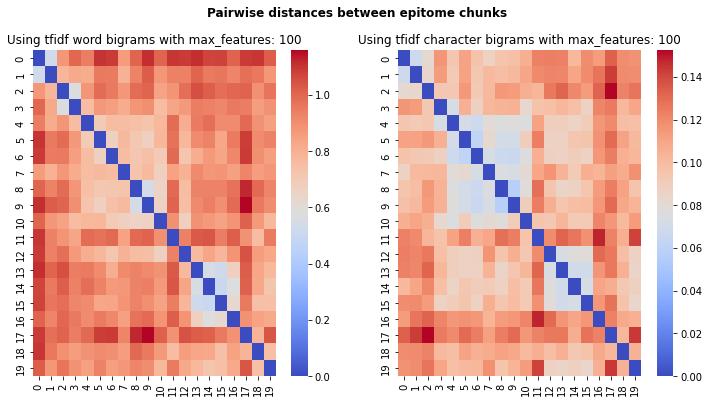

In [63]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pairwise distances between epitome chunks', weight='semibold')
fig.set_size_inches(12, 6)
sns.heatmap(distances_word_bigrams, ax=axes[0], cmap='coolwarm')
axes[0].set_title('Using tfidf word bigrams with max_features: 100')

sns.heatmap(distances_char_bigrams, ax=axes[1], cmap='coolwarm')
axes[1].set_title('Using tfidf character bigrams with max_features: 100');

In [68]:
epitome_numbers = [int(re.search('\d+', file).group()) for file in os.listdir('../epitomes')]

In [71]:
55*4, 55*9

(220, 495)

In [72]:
epitome_numbers[220], epitome_numbers[495]

(358, 952)

In [74]:
tfidf_char_bigrams = TfidfVectorizer(analyzer='char', ngram_range=(2, 2), max_features=100)
epitomes_char_bigrams = tfidf_char_bigrams.fit_transform(epitomes)
distances_char_bigrams = pairwise_distances(epitomes_char_bigrams)

Text(0.5, 1.0, 'Pairwise distances between each individual epitome')

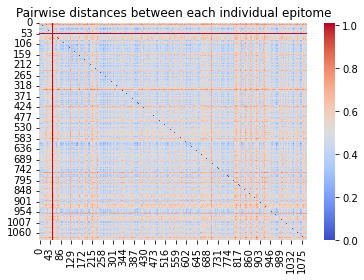

In [77]:
fig, ax = plt.subplots()

sns.heatmap(distances_char_bigrams, ax=ax, cmap='coolwarm')
ax.set_title('Pairwise distances between each individual epitome');

In [78]:
#the red line corresponds to about epitome 190, which is probably the empty file e0191del.txt
epitome_numbers[50]

190

In [79]:
import cltk

ModuleNotFoundError: No module named 'cltk'